In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


## One Condition HDDM

#### Load the data and and check data

In [13]:
# Load data from csv file into a NumPy structured array
dataAll = hddm.load_csv('./rt_dataframes/all.csv')
dataAll.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [14]:
dataAll = dataAll.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAll['rt'] = dataAll['rt'] / 1000
dataAll.head(10)


,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


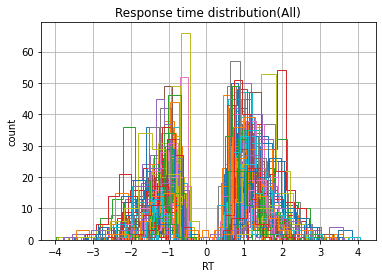

In [15]:
#flip the error RTs to be negative
dataAll = hddm.utils.flip_errors(dataAll)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(All)')
for i, subj_data in dataAll.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(All).png')

## Fitting the hierarchical model for one condition with no subject effects

In [6]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(dataAll, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM1C/traces(1C).db', db='pickle')
m.save('./fitting_results/HDDM/HDDM1C/model(1C)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1154.7 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


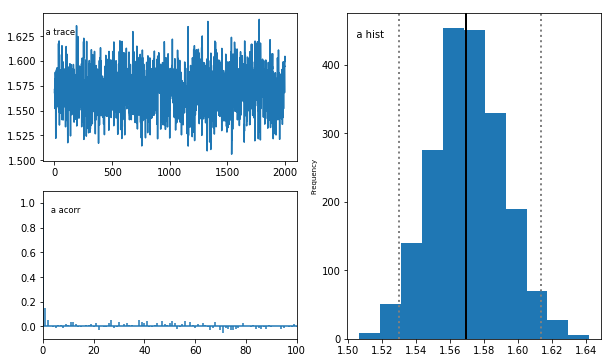

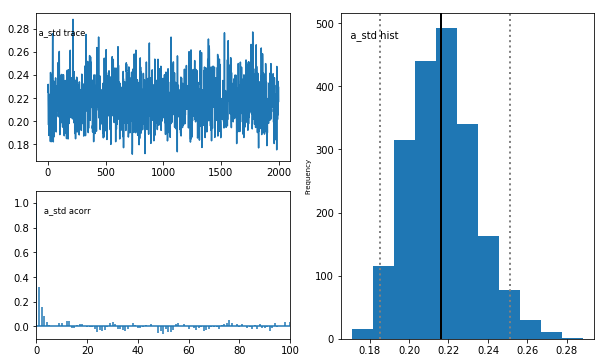

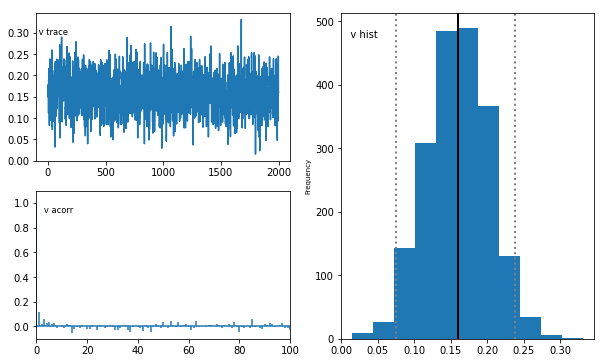

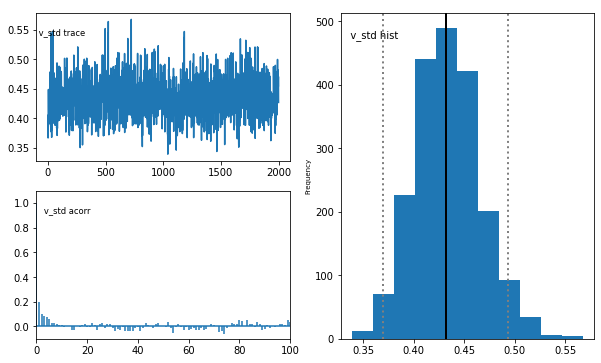

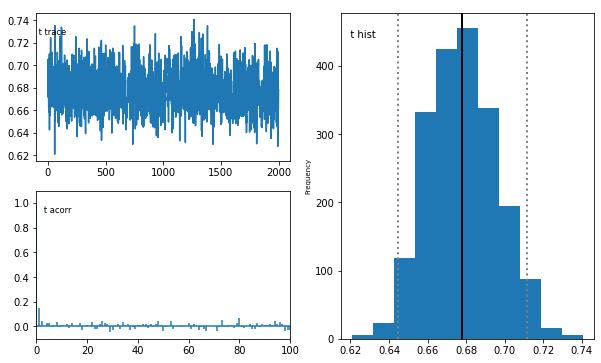

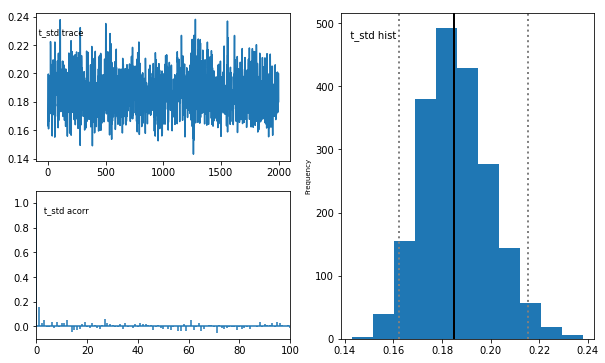

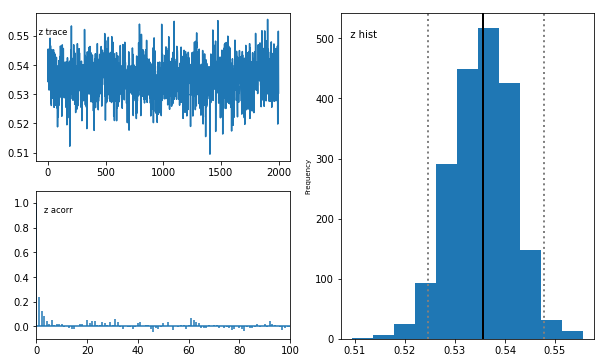

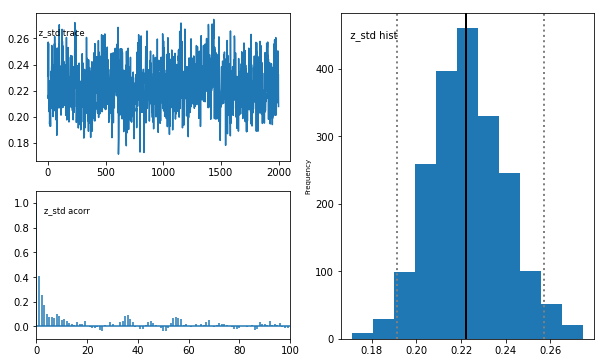

In [7]:
#plot posterior samples
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [8]:
stats1C = m.gen_stats()
stats1C[stats1C.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.5702,0.0209665,1.5282,1.55627,1.56939,1.5849,1.61189,0.000580399
a_std,0.216997,0.0171619,0.186304,0.204708,0.216113,0.227525,0.253675,0.000576231
v,0.160353,0.0426974,0.0775585,0.131291,0.160347,0.190459,0.243143,0.00117307
v_std,0.434083,0.0325171,0.376022,0.41156,0.432205,0.454617,0.501941,0.00100532
t,0.678242,0.0177628,0.645782,0.66528,0.677661,0.690538,0.713448,0.000480344
t_std,0.186083,0.0139315,0.161724,0.176314,0.184995,0.194872,0.215208,0.000385247
z,0.535531,0.00607476,0.523481,0.531329,0.535698,0.539838,0.5469,0.000190907
z_std,0.223188,0.0167173,0.192629,0.211584,0.222207,0.234388,0.258878,0.000696714


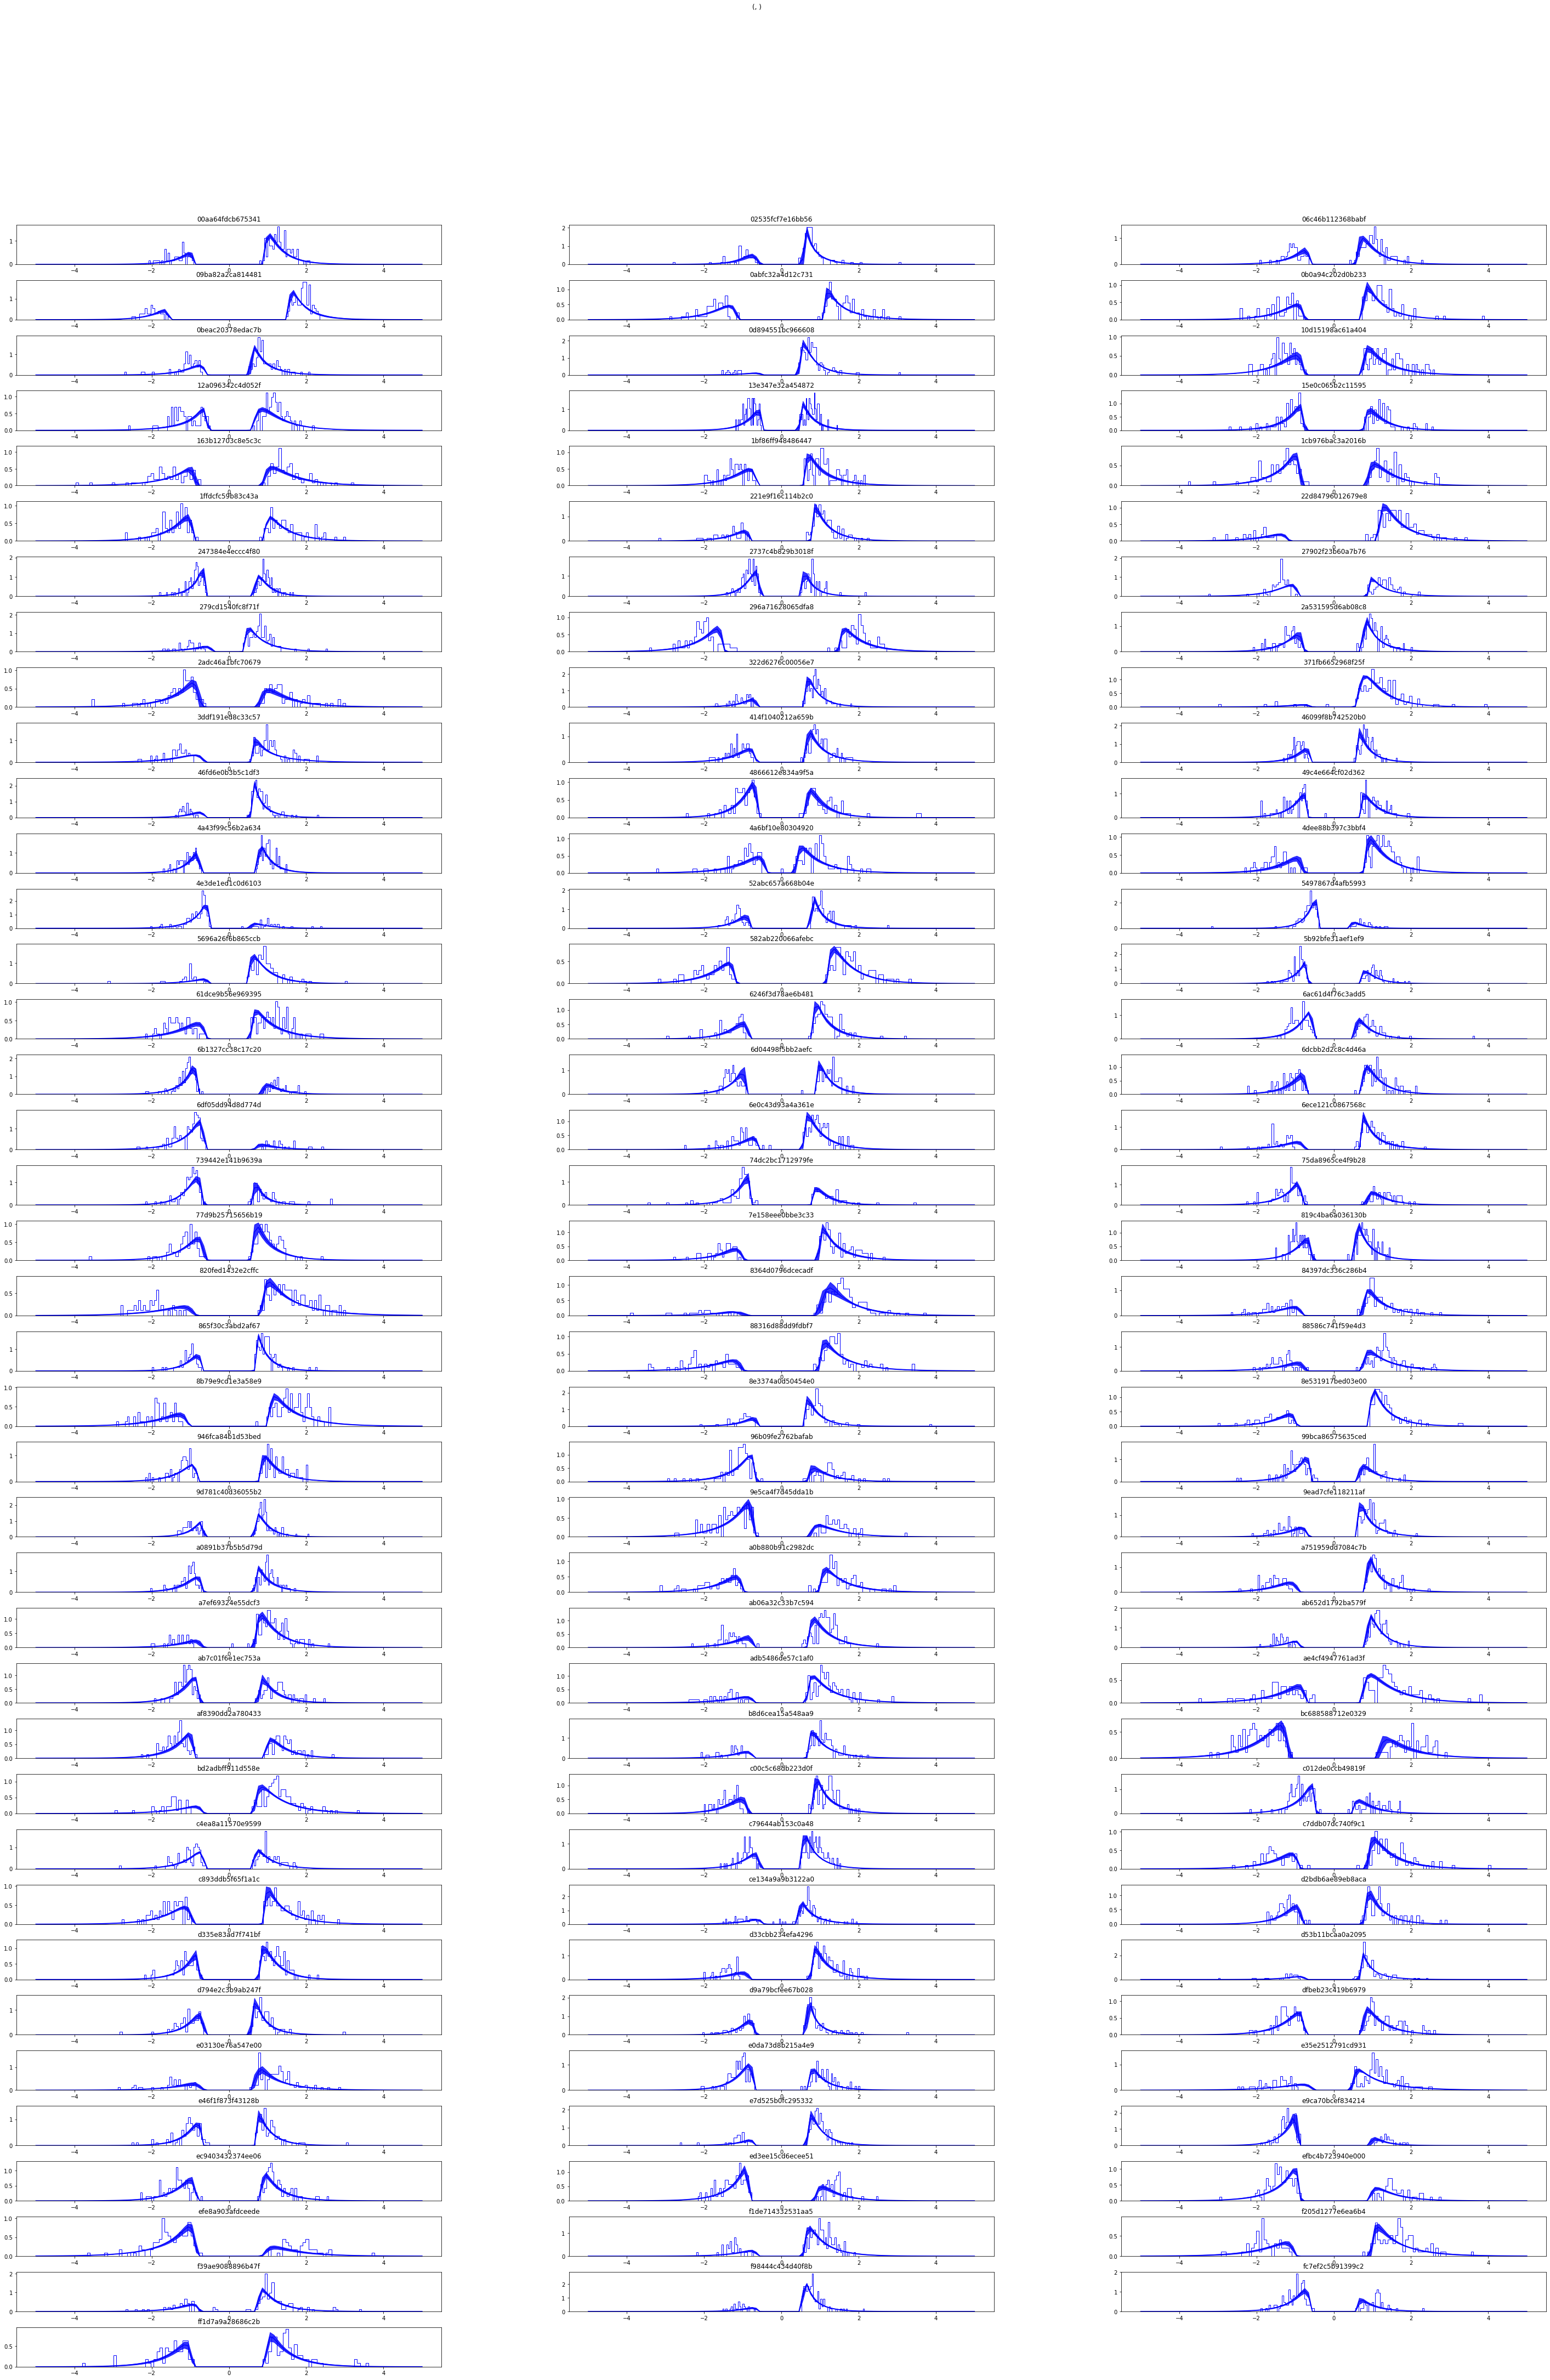

In [26]:
m.plot_posterior_predictive(figsize=(50, 70))

In [27]:
m.dic

32649.089860459106

## Check for Model convergence

In [10]:
# Set up models list to append results
models = list()

In [19]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM1C/chain_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM1C/chain1CCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [20]:
num_chains = 5
data_chains = [(dataAll,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)

Fitting chain 2Fitting chain 0Fitting chain 1Fitting chain 3



Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------98%----------------- ] 2951 of 3000 complete in 1083.6 sec               0%                  ] 3 of 3000 complete in 0.7 sec[                  0%                  ] 3 of 3000 complete in 0.7 sec [                  0%                  ] 3 of 3000 complete in 0.7 sec  [                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.4 sec[                  0%                  ] 5 of 3000 complete in 1.5 sec[                  0%                  ] 7 of 3000 complete in 2.1 sec[                  0%                  ] 7 of 3000 complete in 2.1 sec[                  0%                  ] 7 of 3000 complete in 2.1 sec[                  0%                  ] 7 of 3000 complete in 2.1 sec[                  0%                  ] 7 of 3000 complete in 2.2 sec[              

In [11]:
for i, model in enumerate(models):
    model.save(f'./fitting_results/HDDM/HDDM1C/chain_{i}')
print('Finished all chains')

Finished all chains


In [21]:
#check for model loading
models

In [22]:
# check model convergence
results = hddm.analyze.gelman_rubin(models)
for key, value in results.items():
    print(f"{key}: {value}")



a: 1.001730809891755
a_std: 1.0029521761000335
a_subj.00aa64fdcb675341: 0.999938756845106
a_subj.02535fcf7e16bb56: 1.0091756698326084
a_subj.06c46b112368babf: 0.9998539476673007
a_subj.09ba82a2ca814481: 0.9998641180506038
a_subj.0abfc32a4d12c731: 1.000434838156494
a_subj.0b0a94c202d0b233: 1.000232468629366
a_subj.0beac20378edac7b: 1.0006558155004932
a_subj.0d894551bc966608: 1.000589035615214
a_subj.10d15198ac61a404: 0.9999399231588995
a_subj.12a096342c4d052f: 1.0000452554502903
a_subj.13e347e32a454872: 1.000126259194105
a_subj.15e0c065b2c11595: 1.0006782041229119
a_subj.163b12703c8e5c3c: 0.999978273639474
a_subj.1bf86ff948486447: 0.999934340233464
a_subj.1cb976bac3a2016b: 1.000783902599185
a_subj.1ffdcfc59b83c43a: 1.001129333707503
a_subj.221e9f16c114b2c0: 1.000030908586674
a_subj.22d84796012679e8: 1.0001604218100613
a_subj.247384e4eccc4f80: 1.000606601260786
a_subj.2737c4b829b3018f: 1.0006366529707267
a_subj.27902f23b60a7b76: 1.000343089832841
a_subj.279cd1540fc8f71f: 1.00068666448269

In [23]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{'a_subj.296a71628065dfa8': 1.887094309613198, 'v_subj.296a71628065dfa8': 1.2061558808240678, 't_subj.296a71628065dfa8': 2.831598859329929, 'z_subj_trans.296a71628065dfa8': 1.526716528697067}

Values smaller than the threshold:
{}
